In [1]:
info = {
 "title": "Gingerbread People",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1920, 1080)
}

In [2]:
import numpy as np
from math import pi

from stylo.domain.transform import translate, rotate
from stylo.color import FillColor
from stylo.shape import Circle, Shape, Triangle, Rectangle, Ellipse
from stylo.image import LayeredImage

In [3]:
red = FillColor("ff0000")
green = FillColor("008800")
brown = FillColor("D2691E")
darkbrown = FillColor("C1580D")
black = FillColor()
blue = FillColor("0000dd")
white = FillColor("ffffff")

In [4]:
class Pattern(Shape):
    
    def draw(self):
        
        def pattern(x, y):
            
            ry = np.sin(pi/4)*x + np.cos(pi/4)*y
            return np.abs(ry % 0.1) < 0.05
        
        return pattern
    
class Grid(Shape):
    
    def __init__(self, scale=1, invert=False):
        self.scale = scale
        self.invert = invert
    
    def draw(self):
        
        def grid(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            rx = np.cos(-pi/4)*x - np.sin(-pi/4)*y
            ry = np.sin(-pi/4)*x + np.cos(-pi/4)*y
            
            square1_y = np.abs(ry % 0.4) < 0.2
            square2_y = np.abs(ry % 0.4) > 0.2
            square1_x = np.abs(rx % 0.4) < 0.2
            square2_x = np.abs(rx % 0.4) > 0.2
            
            square1 = np.logical_and(square1_y, square1_x)
            square2 = np.logical_and(square2_y, square2_x)
            
            pattern = np.logical_or(square1, square2)
            
            if self.invert:
                pattern = np.logical_not(pattern)
            
            return pattern
        
        return grid
    
class GingerBoy(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
        
    def draw(self):
        
        head = Circle(y=0.5, r=0.3, fill=True)
        body = Triangle((0, 0.6), (-0.29, -0.5), (0.29, -0.5))
        
        arm = Rectangle(x=0.2, y=0, width=0.5, height=0.25)
        hand = Circle(x=0.45, y=0, r=0.125, fill=True)
        
        leg = Rectangle(x=0, y=0, width=0.26, height=0.4)
        foot = Circle(x=0.05, y=-0.78, r=0.129, fill=True)
        
        def ginger(x, y):
            x = x / self.scale
            y = y / self.scale
            
            # Mirror the x values to get the symmetry for free.
            mx = np.abs(x)
            
            # Rotation for the arm1
            a1 = -pi/12
            rx1 = np.cos(a1)*x - np.sin(a1)*y
            ry1 = np.sin(a1)*x + np.cos(a1)*y
            
            # Rotation for the legs
            a2 = -pi/16
            rx2 = np.cos(a2)*mx - np.sin(a2)*y
            ry2 = np.sin(a2)*mx + np.cos(a2)*y          
            
            # Rotation for arm2
            a3 = pi/6
            rx3 = np.cos(a3)*(-x) - np.sin(a3)*y
            ry3 = np.sin(a3)*(-x) + np.cos(a3)*y
            
            bread = head(x=x, y=y)
            bread = np.logical_or(bread, body(x=x, y=y))
            
            bread = np.logical_or(bread, arm(x=rx1, y=ry1))
            bread = np.logical_or(bread, hand(x=rx1, y=ry1))
                        
            bread = np.logical_or(bread, arm(x=rx3, y=ry3))
            bread = np.logical_or(bread, hand(x=rx3, y=ry3))
            
            bread = np.logical_or(bread, leg(x=(rx2 - 0.05), y=(ry2 + 0.6)))
            bread = np.logical_or(bread, foot(x=rx2, y=ry2))
        
            return bread
        
        return ginger   
    
    
class GingerGirl(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
        
    def draw(self):
        
        head = Circle(y=0.5, r=0.3, fill=True)
        body = Triangle((0, 0.6), (-0.39, -0.5), (0.39, -0.5))
        
        arm = Rectangle(x=0.2, y=0, width=0.5, height=0.25)
        hand = Circle(x=0.45, y=0, r=0.125, fill=True)
        
        leg = Rectangle(x=0, y=0, width=0.26, height=0.4)
        foot = Circle(x=0.05, y=-0.78, r=0.129, fill=True)
        
        cutout = Ellipse(x=0.05, y=-0.54, a=1.1, r=0.126, fill=True) 
        
        def ginger(x, y):
            x = x / self.scale
            y = y / self.scale
            
            # Mirror the x values to get the symmetry for free.
            mx = np.abs(x)
            
            # Rotation for the arms
            a1 = -pi/12
            rx1 = np.cos(a1)*mx - np.sin(a1)*y
            ry1 = np.sin(a1)*mx + np.cos(a1)*y
            
            # Rotation for the legs
            a2 = -pi/16
            rx2 = np.cos(a2)*mx - np.sin(a2)*y
            ry2 = np.sin(a2)*mx + np.cos(a2)*y          
            
            bread = head(x=x, y=y)
            bread = np.logical_or(bread, body(x=x, y=y))
            
            bread = np.logical_or(bread, arm(x=rx1, y=ry1))
            bread = np.logical_or(bread, hand(x=rx1, y=ry1))
            
            bread = np.logical_or(bread, leg(x=(rx2 - 0.05), y=(ry2 + 0.6)))
            bread = np.logical_or(bread, foot(x=rx2, y=ry2))
            
            return bread
        
        return ginger  
            
class Bow(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
        
    def draw(self):
        
        center = Circle(r=0.1, fill=True)
        tri = Triangle((0,0), (0.4, -0.2), (0.4, 0.2))
        
        def bow(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            shape = center(x=x, y=y)
            shape = np.logical_or(shape, tri(x=np.abs(x), y=y))
            
            return shape
            
        return bow
    
class Mouth(Shape):
    
    def draw(self):
        
        shape = Circle(r=0.2, pt=0.01)
        
        x1, y1 = 0.2*np.cos(0.9 - pi/2), 0.2*np.sin(0.9 - pi/2)
        cap1 = Circle(x=x1, y=y1, r=0.03, fill=True)
        
        x2, y2 = 0.2*np.cos(-0.9 - pi/2), 0.2*np.sin(-0.9 - pi/2)
        cap2 = Circle(x=x2, y=y2, r=0.03, fill=True)
        
        def mouth(x, y, t):
            bounds = np.abs(t + pi/2) < 0.9
            
            curve =  np.logical_and(shape(x=x, y=y), bounds)
            curve = np.logical_or(curve, cap1(x=x, y=y))
            curve = np.logical_or(curve, cap2(x=x, y=y))
            
            return curve
        
        return mouth
          
class Cane(Shape):
    
    def draw(self):
            
        y1 = 0.3
        
        stem = Rectangle(x=0, y=-0.1, width=0.08, height=0.8)
        outer_hook = Circle(x=0.16, y=y1, r=0.2, fill=True)
        inner_hook = Circle(x=0.16, y=y1, r=0.12, fill=True)
        
        cap1 = Circle(x=0.32, y=y1, r=0.04, fill=True)
        cap2 = Circle(y=-0.5, r=0.04, fill=True)
        
        def cane(x, y):
            
            inner = np.logical_not(inner_hook(x=x, y=y))
            ring = np.logical_and(outer_hook(x=x, y=y), inner)
            
            hook = np.logical_and(ring, y >= y1)
            
            candy = np.logical_or(stem(x=x, y=y), hook)
            candy = np.logical_or(candy, cap1(x=x, y=y))
            
            return np.logical_or(candy, cap2(x=x, y=y))
            
        return cane
    
class CandyCane(Shape):
    
    def __init__(self, invert=False, flip=False, scale=1):
        self.invert = invert
        self.flip = flip
        self.scale = scale
    
    def draw(self):
        
        cane = Cane()
        
        def candy(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            if self.flip:
                x = -x
            
            # Rotate the domain by hand.
            rx = np.cos(-pi/4)*x - np.sin(-pi/4)*y
            ry = np.sin(-pi/4)*x + np.cos(-pi/4)*y
            
            stripes = rx/4 < -np.sin(28*ry*pi)
            
            if self.invert:
                stripes = np.logical_not(stripes)
            
            candycane = np.logical_and(cane(x=x, y=y), stripes)
            
            return candycane
            
        return candy
    
class HatRim(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
        
    def draw(self):
        
        c1 = Circle(r=0.2, fill=True)
        c2 = Circle(x=0.2, y=-0.03, r=0.18, fill=True)
        c3 = Circle(x=0.4, y=-0.06, r=0.16, fill=True)
        
        def hat(x, y):
            x = x / self.scale
            y = y / self.scale
            
            x = np.abs(x)
            
            shape = np.logical_or(c1(x=x, y=y), c2(x=x, y=y))
            shape = np.logical_or(shape, c3(x=x, y=y))
            
            return shape
        return hat
    
class Basket(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
        
    def draw(self):
        
        handle = Rectangle(x=0, y=0.15, width=0.05, height=0.3)
        base = Ellipse(r=0.2, a=1.6, fill=True)
        
        def basket(x, y):

            mask = y < 0
            return np.logical_and(base(x=x, y=y), mask)
        
        return basket
    
class Cover(Shape):
    
    def __init__(self, scale=1, invert=False):
        self.scale = scale
        self.invert = invert
    
    def draw(self):
        
        tri = Triangle((0.4, 0), (0.25, -0.2), (0, 0))
        grid = Grid(scale=self.scale, invert=self.invert)
        
        def cover(x, y):
            mask = grid(x=x, y=y)
            shape = tri(x=np.abs(x), y=y)

            return np.logical_and(shape, mask)
            
        return cover

In [5]:
pattern = Pattern()
gingerboy = GingerBoy() >> translate(-0.75, 0)

button1 = Circle(x=-0.75, y=-0.1, r=0.05, fill=True)
button2 = Circle(x=-0.75, y=-0.25, r=0.05, fill=True)
button3 = Circle(x=-0.75, y=0.05, r=0.05, fill=True)

bow1 = Bow(scale=0.3) >> translate(-0.75, 0.2)

eye1 = Circle(x=-0.85, y=0.55, r=0.05, fill=True)
eye2 = Circle(x=-0.65, y=0.55, r=0.05, fill=True)
mouth1 = Mouth() >> translate(-0.75, 0.52)

cane = CandyCane(flip=True, scale=0.55) >> rotate(pi/8) >> translate(-1.25, -0.6)
inv_cane = CandyCane(True, flip=True, scale=0.55) >> rotate(pi/8) >> translate(-1.25, -0.6)

hat_rim = HatRim(scale=0.45) >> rotate(pi/5) >> translate(-0.57, 0.73)
hat = Ellipse(y=0.07, r=0.15, a=1.5, fill=True) >> rotate(pi/5) >> translate(-0.57, 0.73)
hat_top = Triangle((-0.15, 0.18), (0.1, 0), (0.5, 0.3)) >> rotate(pi/5) >> translate(-0.57, 0.73)
hat_fluff = Circle(x=-0.05, y=0.7, fill=True, r=0.06)

In [6]:
gingergirl = GingerGirl() >> translate(0.75, 0)

eye3 = Circle(x=0.85, y=0.55, r=0.05, fill=True)
eye4 = Circle(x=0.65, y=0.55, r=0.05, fill=True)
mouth2 = Mouth() >> translate(0.75, 0.52)

button4 = Circle(x=0.75, y=-0.1, r=0.05, fill=True)
button5 = Circle(x=0.75, y=0.1, r=0.05, fill=True)

hat_rim2 = HatRim(scale=0.45) >> rotate(pi/5) >> translate(0.89, 0.73)
hat2 = Ellipse(y=0.07, r=0.15, a=1.5, fill=True) >> rotate(pi/5) >> translate(0.89, 0.73)
hat_top2 = Triangle((-0.15, 0.18), (0.1, 0), (0.5, 0.3)) >> rotate(pi/5) >> translate(0.89, 0.73)
hat_fluff2 = Circle(x=0.52, y=0.7, fill=True, r=0.06) >> translate(0.89, 0)

basket = Basket() >> translate(1.25, -0.3)
cover = Cover(scale=0.4) >> translate(1.25, -0.3)
inv_cover = Cover(scale=0.4, invert=True) >> translate(1.25, -0.3)
handle = Rectangle(x=0, y=0.2, height=0.5, width=0.05) >> translate(1.25, -0.3)

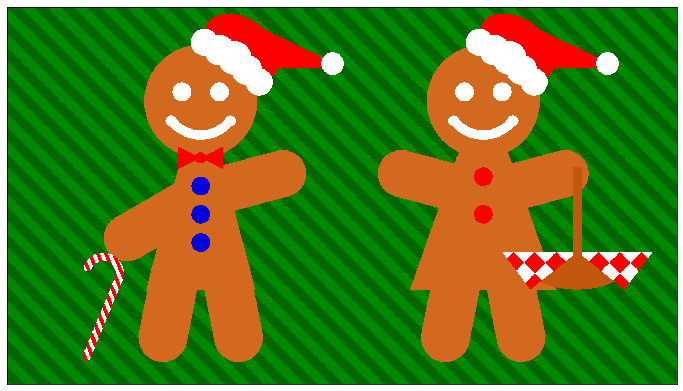

In [7]:
image = LayeredImage(background="006600")

image.add_layer(pattern, green)
image.add_layer(gingerboy, brown)

image.add_layer(eye1, white)
image.add_layer(eye2, white)
image.add_layer(mouth1, white)

image.add_layer(button1, blue)
image.add_layer(button2, blue)
image.add_layer(button3, blue)

image.add_layer(bow1, red)

image.add_layer(cane, red)
image.add_layer(inv_cane, white)

image.add_layer(hat, red)
image.add_layer(hat_top, red)
image.add_layer(hat_rim, white)
image.add_layer(hat_fluff, white)



image.add_layer(gingergirl, brown)

image.add_layer(eye3, white)
image.add_layer(eye4, white)
image.add_layer(mouth2, white)

image.add_layer(button4, red)
image.add_layer(button5, red)

image.add_layer(hat2, red)
image.add_layer(hat_top2, red)
image.add_layer(hat_rim2, white)
image.add_layer(hat_fluff2, white)

image.add_layer(basket, darkbrown)
image.add_layer(cover, red)
image.add_layer(inv_cover, white)
image.add_layer(handle, darkbrown)

image(1920, 1080)